In [3]:
from datetime import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
root = os.getcwd()[-0:-7]

In [1]:
# import subprocess

# try:
#     subprocess.check_output('nvidia-smi')
#     print('Nvidia GPU detected!')
# except Exception: # this command not being found can raise quite a few different errors depending on the configuration
#     print('No Nvidia GPU in system!')


# print(torch.cuda.is_available())
# print(torch.backends.cudnn.enabled)

Nvidia GPU detected!


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


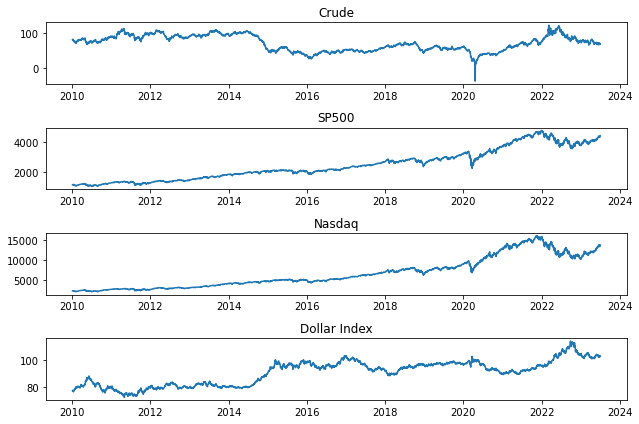

In [2]:
# import modules

  
# initialize parameters
start_date = datetime(2010, 1, 1)
end_date = datetime(2023, 7, 1)
  
# get the data
crude_prc = yf.download('CL=F', start = start_date,
                   end = end_date)

sp_prc = yf.download('^GSPC', start = start_date,
                   end = end_date)

ns_prc = yf.download('^IXIC', start = start_date,
                   end = end_date)

usd_prc = yf.download('^NYICDX', start = start_date,
                   end = end_date)



# display
# plt.figure(figsize = (20,10))
# plt.title('Opening Prices from {} to {}'.format(start_date,
                                                # end_date))
# plt.plot(data['Open'])
# plt.show()

fig, ax = plt.subplots(4, 1, figsize=(9, 6))
ax[0].plot(crude_prc['Close'])
ax[0].set_title('Crude')
ax[1].plot(sp_prc['Close'])
ax[1].set_title('SP500')
ax[2].plot(ns_prc['Close'])
ax[2].set_title('Nasdaq')
ax[3].plot(usd_prc['Close'])
ax[3].set_title('Dollar Index')
fig.tight_layout()
plt.show()

In [5]:
x = yf.Ticker("X")

x.news

[{'uuid': '921e32d3-8a25-37ec-aa99-4a6dcd9c4e5f',
  'title': "U. S. Steel Recognized as a 'Best Place to Work for Disability Inclusion' with Top Disability Equality Index Score",
  'publisher': 'Business Wire',
  'link': 'https://finance.yahoo.com/news/u-steel-recognized-best-place-143000945.html',
  'providerPublishTime': 1690381800,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/GAc5b.MkO8Sj1.HoUFEblA--~B/aD04MTt3PTE0NDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/business-wire.com/60fe2aba287bbcd459b7fbeb8d129477',
     'width': 144,
     'height': 81,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/GykyFL8c6JBn1WbkATpc9g--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/business-wire.com/60fe2aba287bbcd459b7fbeb8d129477',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['X']},
 {'uuid': '5926fb0e-6b0c-3b6e-a58b-8564b6e61887',
  'title

In [8]:
import requests

url = "https://investing4.p.rapidapi.com/news/commodities-news"

headers = {
    "X-RapidAPI-Key": "0c30bcff20msh8dd4f2e2b7dd867p1348d7jsn499f939928cb",
    "X-RapidAPI-Host": "investing4.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

print(response.json())

{'data': [{'link': 'https://www.investing.com/news/commodities-news/oil-down-first-time-in-a-week-as-us-draws-disappoint-fed-hawkish-3135002', 'publisher': 'By Investing.com', 'shortDescription': 'Investing.com -- The oil market has thrown its own wrench into the crude rally after disappointing U.S. inventory draws last week.\nThe Federal Reserve’s resumption of a hawkish...', 'title': 'Oil down first time in a week as U.S. draws disappoint, Fed hawkish', 'when': '1 hour ago'}, {'link': 'https://www.investing.com/news/commodities-news/oil-prices-ease-after-build-in-us-crude-stockpiles-3133975', 'publisher': 'By Reuters', 'shortDescription': 'By Arathy Somasekhar HOUSTON (Reuters) - Oil prices fell about 1% on Wednesday, after data showed U.S. crude inventories fell less than expected and the Federal Reserve raised...', 'title': 'Oil falls 1% after Fed rate hike, smaller-than-expected US crude stockdraw', 'when': '2 hours ago'}, {'link': 'https://www.investing.com/news/commodities-news/

In [2]:


prc1 = crude_prc.join(sp_prc, rsuffix = "_sp", lsuffix = "_crd")
prc2 = ns_prc.join(usd_prc, rsuffix = "_usd", lsuffix = "_ns")

prc = prc1.join(prc2)


prc

,Open_crd,High_crd,Low_crd,Close_crd,Adj Close_crd,Volume_crd,Open_sp,High_sp,Low_sp,Close_sp,...,Low_ns,Close_ns,Adj Close_ns,Volume_ns,Open_usd,High_usd,Low_usd,Close_usd,Adj Close_usd,Volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,263542,1116.560059,1133.869995,1116.560059,1132.989990,...,2294.409912,2308.419922,2308.419922,1931380000,77.930000,78.190002,77.260002,77.529999,77.529999,0
2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,258887,1132.660034,1136.630005,1129.660034,1136.520020,...,2295.620117,2308.709961,2308.709961,2367860000,77.370003,77.709999,77.089996,77.620003,77.620003,0
2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,370059,1135.709961,1139.189941,1133.949951,1137.140015,...,2295.679932,2301.090088,2301.090088,2253340000,77.650002,78.000000,77.360001,77.489998,77.489998,0
2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,246632,1136.270020,1142.459961,1131.319946,1141.689941,...,2285.219971,2300.050049,2300.050049,2270050000,77.370003,78.080002,77.300003,77.910004,77.910004,0
2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,310377,1140.520020,1145.390015,1136.219971,1144.979980,...,2290.610107,2317.169922,2317.169922,2145390000,77.980003,78.190002,77.349998,77.470001,77.470001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,69.839996,70.110001,68.709999,69.370003,69.370003,280116,4344.839844,4362.060059,4328.080078,4328.819824,...,13334.419922,13335.780273,13335.780273,4430600000,102.830002,102.830002,102.610001,102.690002,102.690002,0
2023-06-27,69.489998,70.150002,67.500000,67.699997,67.699997,384752,4337.359863,4384.419922,4335.000000,4378.410156,...,13366.969727,13555.669922,13555.669922,5053660000,102.739998,102.800003,102.320000,102.489998,102.489998,0
2023-06-28,68.010002,69.730003,67.050003,69.559998,69.559998,368295,4367.479980,4390.350098,4360.220215,4376.859863,...,13495.730469,13591.750000,13591.750000,4533270000,102.510002,103.150002,102.470001,102.910004,102.910004,0


In [4]:
prc.to_csv(root + "/data/prc.csv")

## EOD News

In [4]:
import os
import pandas as pd

y_name = "tgt_crd"

# Read CSV
dat = pd.read_csv(root + "\\data\\dat.csv")
dat = dat.set_index("dte")
dat = dat.dropna() #data is pre-cleaned no no NA's should be present. This is to make sure.

dates = dat[y_name].index.to_list()
print(min(dates), max(dates))

2010-10-26 2023-06-29


In [66]:
import time
import requests

companies = pd.DataFrame(data = {"company": ["BHP", "VALE", "CLF", "X", "MSB", "RIO", 
                                             "XME", "MALRF", "SXC", "STLD", "NUE", "HRGLF",
                                            "XOM","SHEL", "TTE", "CVX", "BP", "MPC", "VLO"],
                                 "sector": ["i", "i", "i", "i","i", "i", "i", "i","i", "i", "i", "i", "c",
                                           "c", "c", "c", "c", "c", "c"]})

dates_slice = pd.DataFrame(data = {"from": ['2010-10-26','2014-01-01','2017-01-01','2020-01-01','2022-01-01'],
                                     "to": ['2013-12-31','2016-12-31','2019-12-31','2021-12-31','2023-06-29']})

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://eodhistoricaldata.com/api/news?api_token=demo&s=X&offset=0&limit=10'
r = requests.get(url)
data = r.json()

news_init = pd.DataFrame(data)

news = pd.DataFrame(columns = news_init.columns)

for cpy_index, cpy_row in companies.iterrows():
    
    for dte_index, dte_row in dates_slice.iterrows():

        print(dte_row['from'], dte_row['to'])
        
        # replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
        url = 'https://eodhistoricaldata.com/api/news?api_token=demo&s='+cpy_row['company']+ \
            '&api_token=6346f04d999384.85421237&from='+dte_row['from']+'&to='+dte_row['to']+'&limit=1000'
        r = requests.get(url)
        data = r.json()
        
        news_loop = pd.DataFrame(data).dropna()

        if news_loop.shape[1] != 0:
        
            #time.sleep(0.5)
            news_loop["dte"]=(pd.to_datetime(news_loop["date"].str.slice(0,10), format = '%Y-%m-%d'))

            print(cpy_row['company'], cpy_row['sector'], news_loop.shape, min(news_loop["dte"]), max(news_loop["dte"]))

            news_loop["sector"] = cpy_row['sector']
            news_loop["company"] = cpy_row['company']

            news_loop = news_loop.join(pd.DataFrame(news_loop["sentiment"].values.tolist()))

            news = news.append(news_loop)
    
news.to_csv(root + "/data/news_eod.csv")

2010-10-26 2013-12-31
2014-01-01 2016-12-31
BHP i (13, 8) 2016-02-29 00:00:00 2016-04-22 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


BHP i (2, 8) 2018-03-27 00:00:00 2018-06-08 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


BHP i (541, 8) 2020-04-24 00:00:00 2021-12-29 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


BHP i (441, 8) 2022-01-03 00:00:00 2023-06-28 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
VALE i (12, 8) 2015-12-10 00:00:00 2016-02-05 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VALE i (145, 8) 2018-03-12 00:00:00 2019-05-15 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VALE i (357, 8) 2020-03-26 00:00:00 2021-12-31 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VALE i (375, 8) 2022-01-03 00:00:00 2023-06-27 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
CLF i (7, 8) 2015-08-07 00:00:00 2015-12-11 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CLF i (8, 8) 2017-11-01 00:00:00 2019-04-03 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CLF i (308, 8) 2020-06-22 00:00:00 2021-12-30 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CLF i (394, 8) 2022-01-03 00:00:00 2023-06-28 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
X i (114, 8) 2017-05-04 00:00:00 2019-12-20 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


X i (415, 8) 2020-01-14 00:00:00 2021-12-29 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


X i (489, 8) 2022-01-01 00:00:00 2023-06-28 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
MSB i (4, 8) 2018-01-22 00:00:00 2018-07-25 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MSB i (39, 8) 2020-04-15 00:00:00 2021-10-25 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MSB i (10, 8) 2022-01-10 00:00:00 2023-05-31 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
RIO i (9, 8) 2015-09-08 00:00:00 2016-12-26 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


RIO i (25, 8) 2017-01-03 00:00:00 2017-12-16 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


RIO i (554, 8) 2020-04-06 00:00:00 2021-12-28 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


RIO i (751, 8) 2022-01-01 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
2020-01-01 2021-12-31
XME i (6, 8) 2021-01-07 00:00:00 2021-03-03 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


XME i (1, 8) 2022-06-09 00:00:00 2022-06-09 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
2020-01-01 2021-12-31
MALRF i (39, 8) 2020-04-21 00:00:00 2021-12-02 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MALRF i (22, 8) 2022-01-07 00:00:00 2023-06-07 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
SXC i (1, 8) 2016-01-12 00:00:00 2016-01-12 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


SXC i (11, 8) 2017-12-06 00:00:00 2019-05-31 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


SXC i (102, 8) 2020-01-02 00:00:00 2021-12-29 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


SXC i (96, 8) 2022-01-18 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
STLD i (7, 8) 2017-11-07 00:00:00 2019-03-29 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


STLD i (388, 8) 2020-11-26 00:00:00 2021-12-30 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


STLD i (639, 8) 2022-01-05 00:00:00 2023-06-28 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
NUE i (8, 8) 2017-11-07 00:00:00 2019-04-03 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


NUE i (947, 8) 2020-07-08 00:00:00 2021-12-28 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


NUE i (774, 8) 2022-01-03 00:00:00 2023-06-28 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
2020-01-01 2021-12-31
HRGLF i (56, 8) 2020-08-07 00:00:00 2021-12-31 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


HRGLF i (78, 8) 2022-01-07 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
XOM c (19, 8) 2016-05-05 00:00:00 2016-12-29 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


XOM c (12, 8) 2017-01-03 00:00:00 2019-04-03 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


XOM c (1000, 8) 2021-06-11 00:00:00 2021-12-31 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


XOM c (999, 8) 2022-12-15 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
2020-01-01 2021-12-31
2022-01-01 2023-06-29
SHEL c (993, 8) 2022-07-21 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
2020-01-01 2021-12-31
TTE c (419, 8) 2021-06-15 00:00:00 2021-12-30 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


TTE c (1000, 8) 2022-02-16 00:00:00 2023-06-26 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
CVX c (7, 8) 2015-09-29 00:00:00 2016-12-14 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CVX c (23, 8) 2017-01-05 00:00:00 2019-10-31 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CVX c (1000, 8) 2021-05-17 00:00:00 2021-12-31 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


CVX c (1000, 8) 2022-12-20 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
2017-01-01 2019-12-31
BP c (8, 8) 2017-01-17 00:00:00 2019-11-04 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


BP c (664, 8) 2020-04-02 00:00:00 2021-12-30 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


BP c (994, 8) 2022-03-18 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
MPC c (1, 8) 2015-07-30 00:00:00 2015-07-30 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MPC c (17, 8) 2017-05-01 00:00:00 2019-05-10 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MPC c (285, 8) 2020-06-01 00:00:00 2021-12-28 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


MPC c (887, 8) 2022-01-04 00:00:00 2023-06-29 00:00:00
2010-10-26 2013-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


2014-01-01 2016-12-31
VLO c (20, 8) 2016-03-28 00:00:00 2016-12-19 00:00:00
2017-01-01 2019-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VLO c (90, 8) 2017-01-18 00:00:00 2019-12-10 00:00:00
2020-01-01 2021-12-31


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VLO c (267, 8) 2020-01-23 00:00:00 2021-12-29 00:00:00
2022-01-01 2023-06-29


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)


VLO c (839, 8) 2022-01-05 00:00:00 2023-06-28 00:00:00


C:\Users\lawre\AppData\Local\Temp\ipykernel_22288\1244182563.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = news.append(news_loop)
